In [1]:
#Importing all essential libraries:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
pd.set_option('mode.chained_assignment', None)

In [2]:
#Importing raw .csv data:
df = pd.read_csv('Mental health Depression disorder Data.csv', index_col='index', low_memory=False)
df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [3]:
#Displaying all the data types:
df.dtypes

Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

# Cleaning Data
### Deleting duplicate values, null values and removing unnecessary data

In [4]:
#Calculating the sum of all duplicate values:
df.duplicated().sum()

9718

In [5]:
duplicated_data = df[df.duplicated(keep = 'first')==True]
duplicated_data.count()

Entity                       9718
Code                         9474
Year                         9718
Schizophrenia (%)               0
Bipolar disorder (%)            0
Eating disorders (%)         9718
Anxiety disorders (%)           0
Drug use disorders (%)          0
Depression (%)                  0
Alcohol use disorders (%)       0
dtype: int64

In [7]:
# Dropping the duplicated rows

df.drop_duplicates(keep='first',inplace = True)

In [8]:
# Checking null values in df:

df[df.isna().any(axis=1)==True]

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
112,Andean Latin America,NaN,1990,0.195471,0.870564,0.28782,4.217677,0.608921,2.621781,1.748912
113,Andean Latin America,NaN,1991,0.195484,0.870876,0.289362,4.220261,0.610489,2.631717,1.743910
114,Andean Latin America,NaN,1992,0.195497,0.871174,0.290563,4.222587,0.611990,2.639932,1.738703
115,Andean Latin America,NaN,1993,0.195523,0.871482,0.291833,4.224721,0.613995,2.646096,1.733697
116,Andean Latin America,NaN,1994,0.195569,0.871823,0.293111,4.226690,0.616448,2.651022,1.729266
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Creating a new dataframe named 'c_df' to clean dataframe more effectively:
col = ['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)']
c_df = df[col]
c_df.head()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [12]:
#Checking the null values present in the rows:
c_df.isna().any(axis=0).sum()

7

In [14]:
#Dropping null values from dataframe:
c_df.dropna(axis=0, inplace=True)

In [15]:
#Checking if any null values are still remaining:
c_df.isnull().sum()

Entity                       0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64

In [16]:
#Creating a separate dataframe to check all unique and null values:
checkTable = pd.DataFrame({
    'Unique':df.nunique(),
    'null':df.isna().sum(),
    'null percent':(df.isna().sum())/len(df)*100,
    'Type':df.dtypes.values
})
checkTable

,Unique,null,null percent,Type
Entity,276,0,0.000000,object
Code,236,5168,5.228917,object
Year,259,0,0.000000,object
Schizophrenia (%),25661,72960,73.820003,object
Bipolar disorder (%),19358,79429,80.365255,object
Eating disorders (%),72657,8317,8.415035,object
Anxiety disorders (%),6457,92367,93.455760,float64
Drug use disorders (%),6435,92367,93.455760,float64
Depression (%),6460,92367,93.455760,float64
Alcohol use disorders (%),6459,92367,93.455760,float64


In [17]:
#Converting string datatyped to float:
def convert(x):
    if type(x)!=float:
        if x[0] in ['0','1','2','3','4','5','6','7','8','9']:
            return float(x)
        return float(0)
    return x

for i in c_df.columns[2:]:
    c_df[i]=c_df[i].apply(convert)

In [18]:
for i in c_df.columns[2:]:
    print(i)

Schizophrenia (%)
Bipolar disorder (%)
Eating disorders (%)
Anxiety disorders (%)
Drug use disorders (%)
Depression (%)
Alcohol use disorders (%)


## Exploratory Data Analysis
### We will perform EDA on the mean of every mental disorder with respect to Entity and Year

In [19]:
# Grouping average:
avg = c_df.groupby('Entity', as_index = False).agg({'Schizophrenia (%)':'mean', 'Bipolar disorder (%)':'mean','Eating disorders (%)':'mean', 'Anxiety disorders (%)':'mean', 'Drug use disorders (%)':'mean', 'Depression (%)':'mean', 'Alcohol use disorders (%)':'mean'})

In [20]:
#Checking that all required columns are in 'avg':
for i in avg.columns[1:]:
    print(i)

Schizophrenia (%)
Bipolar disorder (%)
Eating disorders (%)
Anxiety disorders (%)
Drug use disorders (%)
Depression (%)
Alcohol use disorders (%)


## Visualization
### We will display bar graphs for every mental issue w.r.t top 10 nations

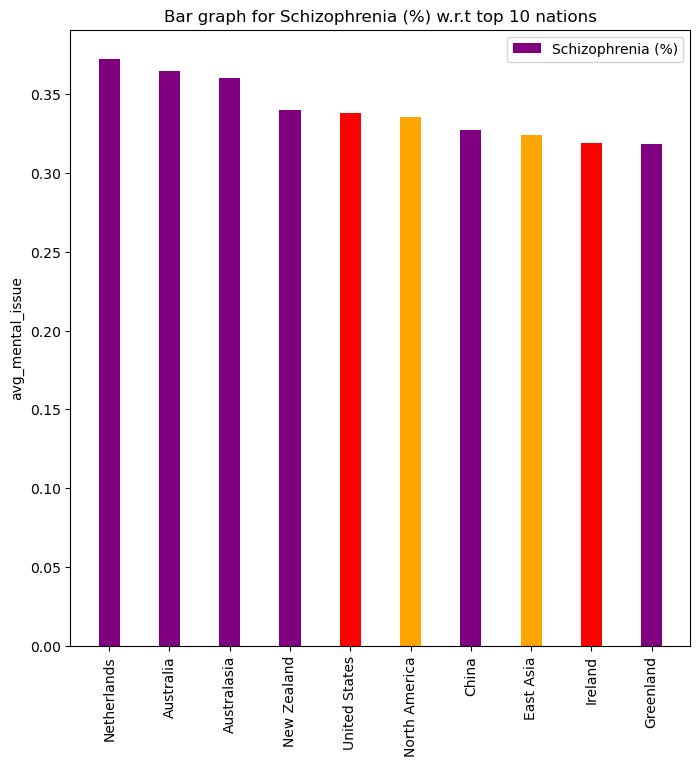

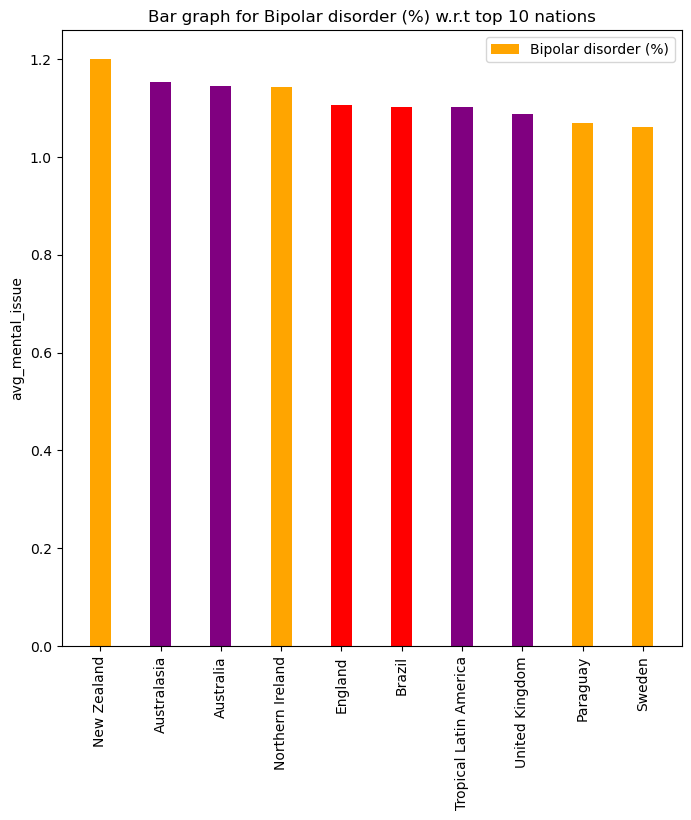

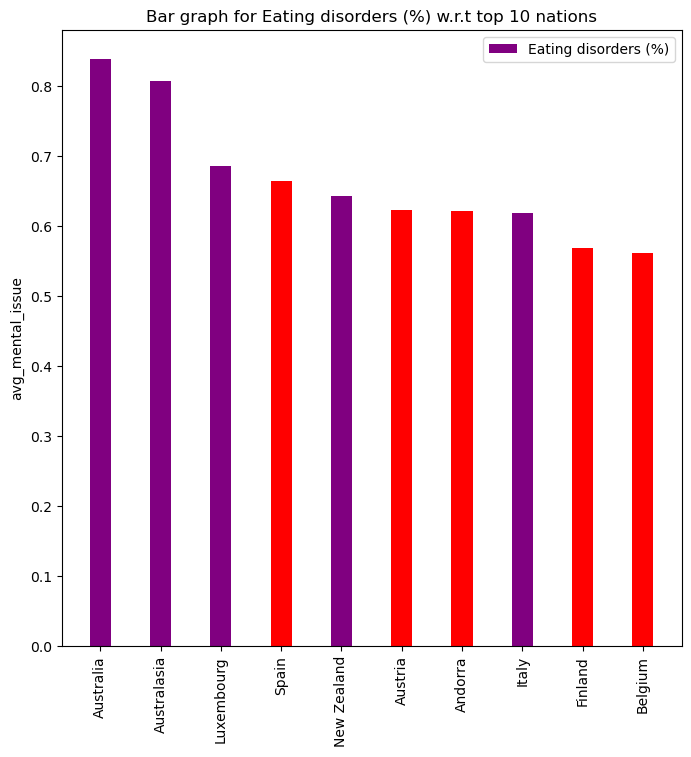

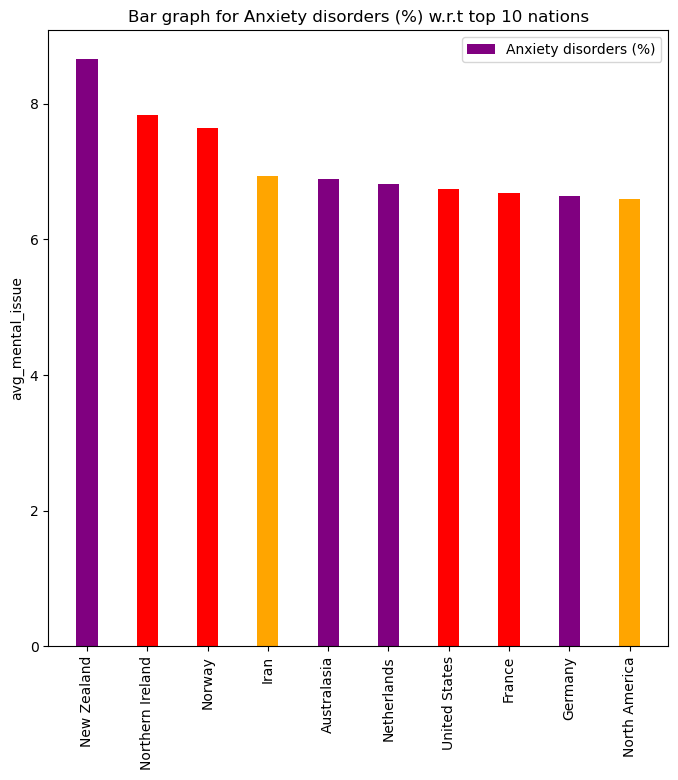

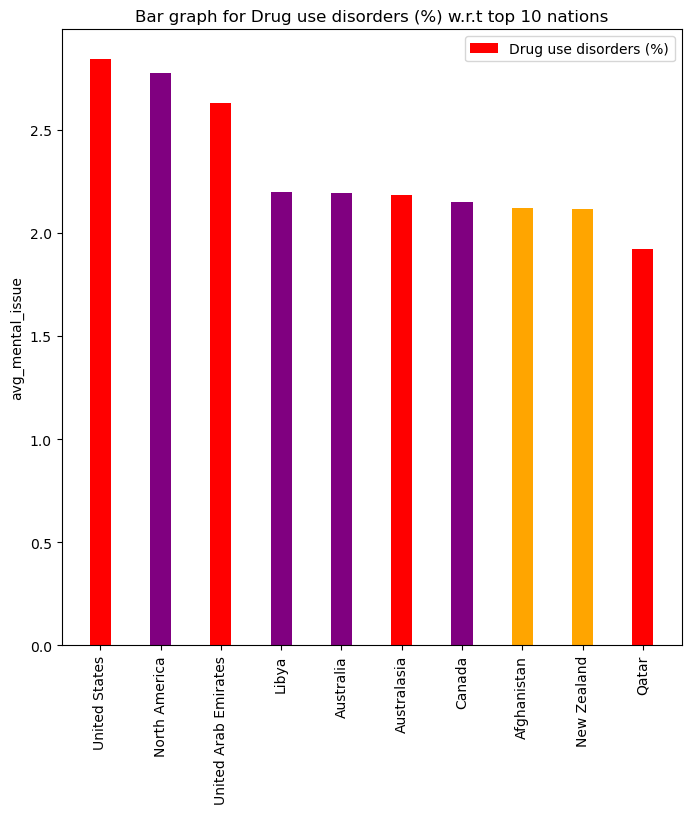

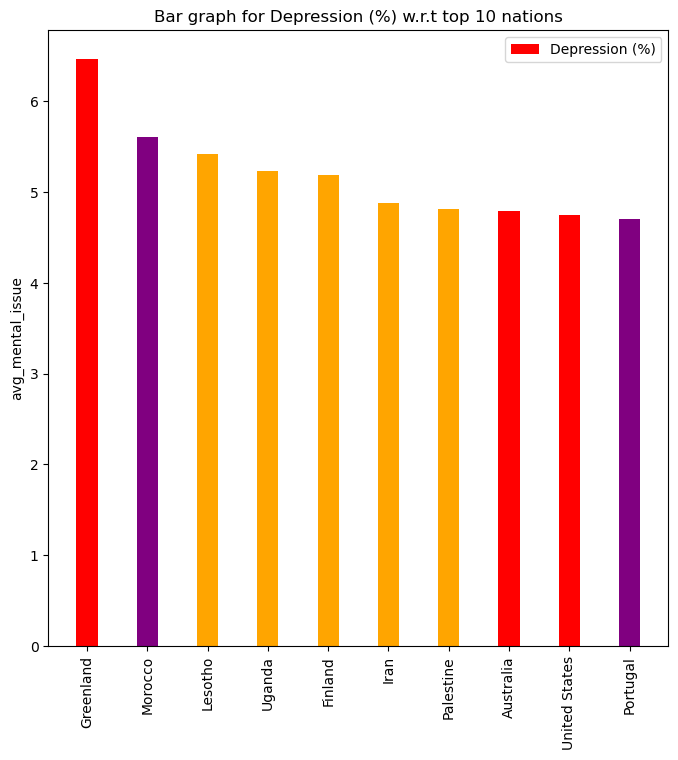

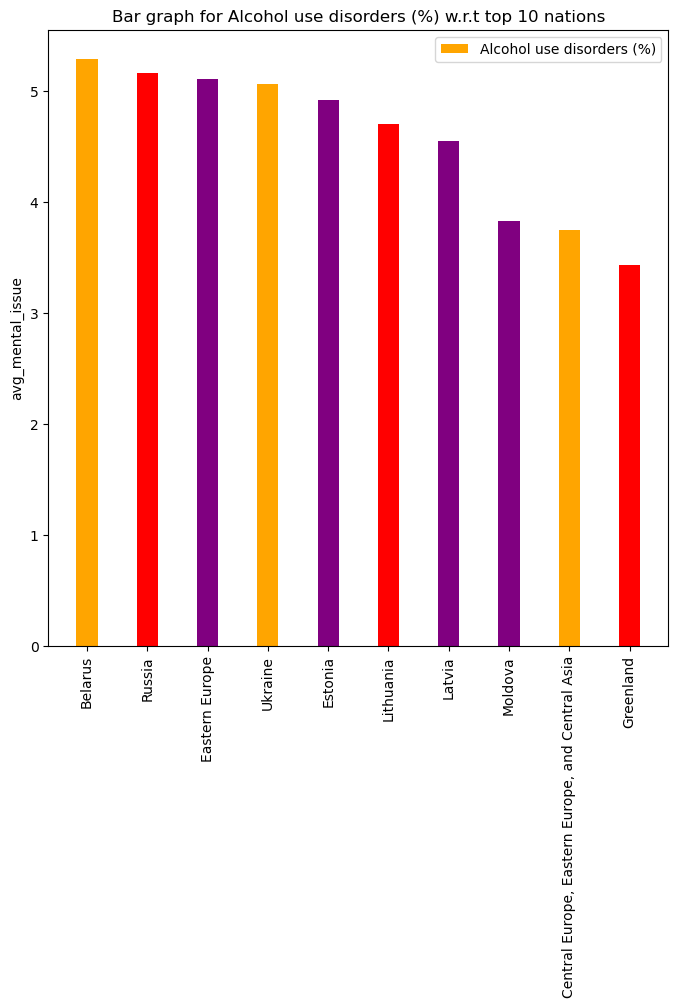

In [23]:
colors = ['red', 'orange', 'purple']

for i in avg.columns[1:]:
    top10Nations = avg.sort_values(by=i, ascending = False).head(10)
    
    #Generating random colors for bars in the figure:
    bar_colors = []
    for j in range(20):
        bar_colors.append(random.choice(colors))
        
    fig, ax = plt.subplots(figsize=(8,8))
    ax.bar(top10Nations['Entity'],top10Nations[i] , width=0.35, label=i, color=bar_colors)
    
    ax.set_ylabel('avg_mental_issue')
    ax.set_title('Bar graph for '+str(i)+ ' w.r.t top 10 nations')
    plt.xticks(rotation=90)
    ax.legend()
    
    plt.show()

## Applying Models
### Applying linear regression to find correlation between Depression and Anxiety

Estimated coefficients:
b0: 5.112869852932488
b1: -0.06931437718052329


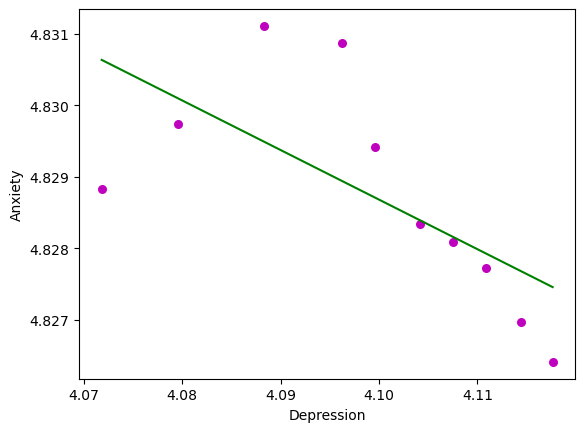

In [28]:
col= ['Year','Depression (%)','Anxiety disorders (%)']
mdata= df[col].head(10)
mdata.rename(columns = {'Depression (%)':'Depression', 'Anxiety disorders (%)':'Anxiety'}, inplace = True)
mdata
x = np.asarray(mdata.Depression.values)
y = np.asarray(mdata.Anxiety.values)

def estimate(x, y):
    n = np.size(x)
    
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    xy = np.sum(y*x) - n*ymean*xmean
    xx = np.sum(x*x) - n*xmean*xmean
    
    b1 = xy / xx
    temp = b1*xmean
    b0 = ymean - temp
    
    return (b0,b1)

def plotting(x, y, b):
    plt.scatter(x, y, color = 'm',
               marker = 'o', s = 30)
    
    ypredict = b[0] + b[1]*x

    plt.plot(x, ypredict, color = "g")
    
    plt.xlabel('Depression')
    plt.ylabel('Anxiety')

    plt.show()
    
def model():

    b = estimate(x, y)
    
    print("Estimated coefficients:")
    print("b0: "+ str(b[0]))
    print("b1: "+ str(b[1]))

    plotting(x, y, b)

model()